In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
flights = pd.read_csv(url1, sep=',')
weather =  pd.read_csv(url2, sep=',')
flights.head(3)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0


In [3]:
weather.head(3)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0


Рассмотрим общее количество вылетов из каждого аэропорта и среднюю задержку в каждом из них

In [4]:
flights.origin.value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

In [5]:
flights.groupby('origin').mean()['dep_delay']

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64

Рассмотрим только строгоположительные задержки по каждому из аэропортов.

In [6]:
flights_delayed = flights[(flights.dep_delay > 0)]
flights_delayed.groupby('origin').mean()['dep_delay']

origin
EWR    38.987915
JFK    38.046775
LGA    41.630959
Name: dep_delay, dtype: float64

Ясно, что каждое из чисел увеличилось, однако, для аэропорта EWR число увеличилось менее, чем в 3 раза, когда LGA увеличилось более чем в 4. То есть, если в LGA случается задержка, то она будет очень долгой, тогда как в EWR задержки чаще, но менее продолжительны. Отсюда руководству LGA следует поработать над длительностью задержек, а EWR над их частотой.

In [7]:
flights_delayed.origin.value_counts()

EWR    52711
JFK    42031
LGA    33690
Name: origin, dtype: int64

Действительно, в аэропрту EWR наибольшее количество небольших задержек, а в LGA наоборот. Аэропорт Джона Кэнэди лавирует на среднем уровне.

Рассмотрим на круговой диаграмме отношение задержанных и незадерженных рейсов в JFK

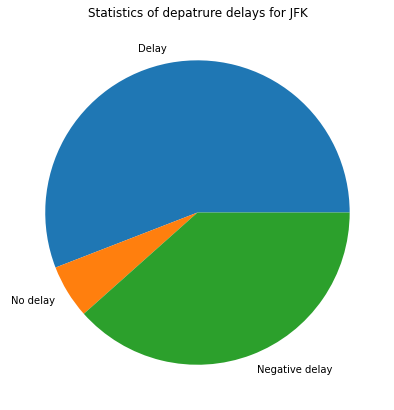

In [8]:
fl_del_ewr = flights[(flights.dep_delay < 0) & (flights.origin == 'JFK')]
fl_fast_ewr = flights[(flights.dep_delay > 0) & (flights.origin == 'JFK')]
fl_nodel_ewr = flights[(flights.dep_delay == 0) & (flights.origin == 'JFK')]
plt.figure(figsize=(7,7))
plt.pie([fl_del_ewr.origin.value_counts()[0],fl_nodel_ewr.origin.value_counts()[0],fl_fast_ewr.origin.value_counts()[0]], labels = ['Delay', 'No delay', 'Negative delay'])
plt.title('Statistics of depatrure delays for JFK')
plt.show()

Рассмотрим среднее время задержек отправки в зависимости от компании перевозчика

Text(0, 0.5, 'Mean delay')

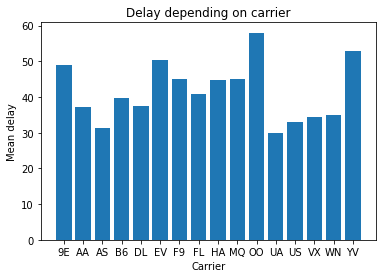

In [13]:
delays = flights_delayed.groupby('carrier').mean()['dep_delay']
plt.bar(range(len(delays)), delays)
plt.xticks(range(len(delays)), delays.index)
plt.title('Delay depending on carrier')
plt.xlabel('Carrier')
plt.ylabel('Mean delay')

Как видно на этой диаграмме наибольшая средняя задержка происходит у компании OO

Рассмотрим задержки полётов в зависимости от возможных погодных условий

Задержки в зависимости от влажности

In [15]:
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

Text(0, 0.5, 'Mean delay')

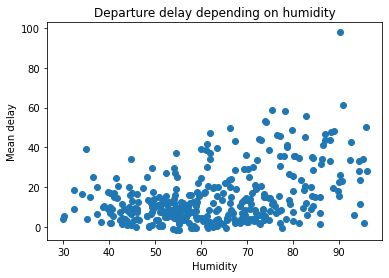

In [16]:
plt.scatter(flights.groupby(['month','day'])['humid'].mean(), flights.groupby(['month','day'])['dep_delay'].mean())
plt.title('Departure delay depending on humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean delay')

Задержки в зависимости от видимости.

Text(0, 0.5, 'Mean arrival delay')

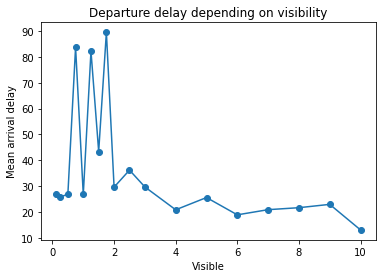

In [18]:
visib_delay = flights.groupby('visib').mean()['dep_delay']
plt.scatter(visib_delay.index, visib_delay)
visib_delay.plot()

plt.title('Departure delay depending on visibility')
plt.xlabel('Visible')
plt.ylabel('Mean arrival delay')

Задержки от скорости ветра.

Text(0, 0.5, 'Mean delay')

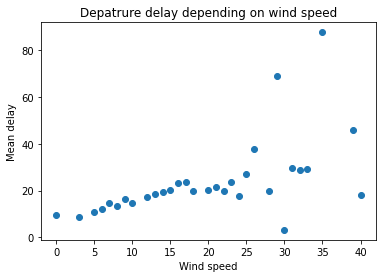

In [19]:
flights['wind_speed'] = flights.wind_speed.apply(lambda x: x if np.isnan(x) else round(x))
wind_delay = flights.groupby('wind_speed').mean()['dep_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.scatter(wind_delay.index, wind_delay)
plt.title('Depatrure delay depending on wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Mean delay')

На всех графиках прослеживается негативное влияние неблагоприятности погодных условий на среднюю задержку отправки рейсов. (Точнее прослеживается положительная корреляция между задержкой рейса и неблагоприятности погодных условий).

Рассмотрим теперь связь между временными показателями рейсов и их задержкой.

Зависимость средней задержки от времени суток.

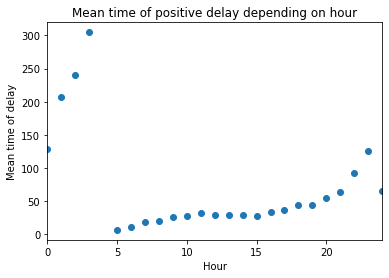

In [21]:
flights_gr = pd.DataFrame(flights_delayed.groupby(flights_delayed.hour)['dep_delay'].mean().reset_index(name='mean_delay'))
plt.scatter(flights_gr.hour, flights_gr.mean_delay)
plt.xlim(0, 24)
plt.ylabel('Mean time of delay')
plt.xlabel('Hour')
plt.title('Mean time of positive delay depending on hour')
plt.show()

Как видно средняя задержка резко увеличивается ночью, это возможно быть связанным как с тем, что ночью меньшая видимость, так и с тем, что ночью персонал работает менее эфективно. 

Среднее время задержки в зависимости от месяца.

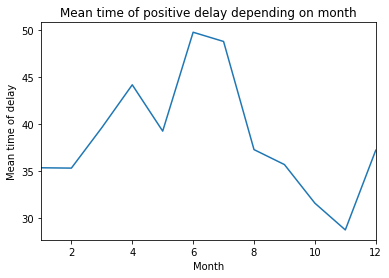

In [22]:
flights_gr = pd.DataFrame(flights_delayed.groupby(flights_delayed.month)['dep_delay'].mean().reset_index(name='mean_delay'))
plt.plot(flights_gr.month, flights_gr.mean_delay,'')
plt.xlim(1, 12)
plt.ylabel('Mean time of delay')
plt.xlabel('Month')
plt.title('Mean time of positive delay depending on month')
plt.show()

То есть наибольшая средня задержка происходит в июнь и июль - месяца отпусков, возможно стоит увеличить количество персонала, мотивировав их оставаться на работе в летние месяцы - повышенными зарплатами.